In [128]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error

# airline_passengers

In [58]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col='Month', parse_dates=True)

In [60]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [62]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [64]:
df.index.freq = 'MS'

In [66]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
df.shape

(144, 1)

In [70]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Multiplicative

In [130]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

C:\Users\nico_\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [131]:
test_prediction = fitted_model.forecast(36) # prédiction des 36 mois de test

<Axes: xlabel='Month'>

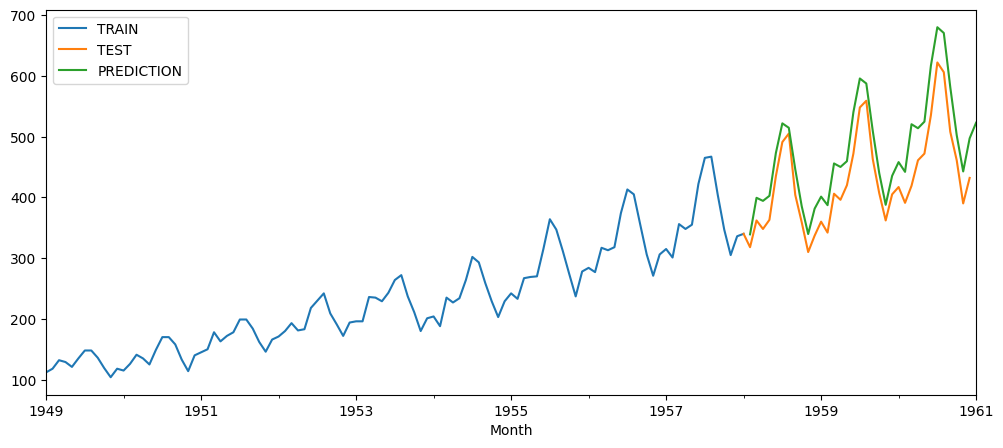

In [134]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_prediction.plot(legend=True, label='PREDICTION')

<Axes: xlabel='Month'>

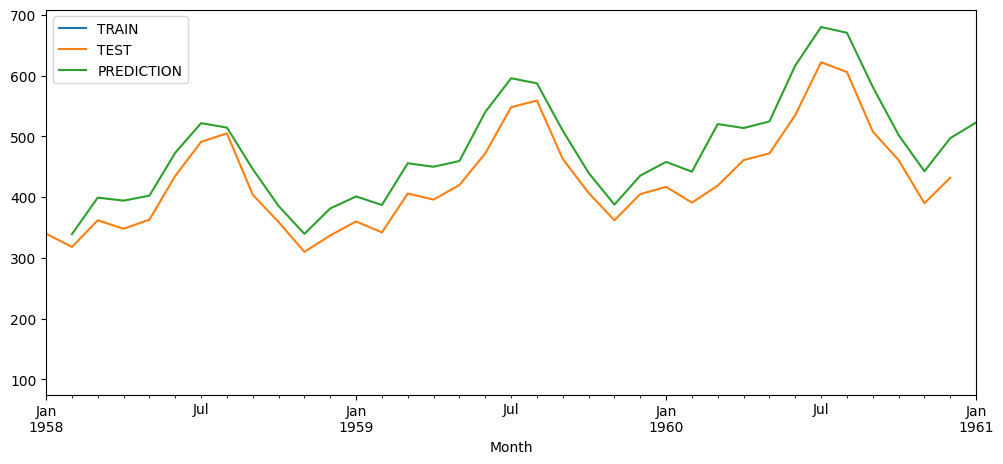

In [135]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_prediction.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

In [137]:
mean_absolute_error(test_data, test_prediction)

63.031128975516594

In [140]:
mean_squared_error(test_data, test_prediction)

5614.257717399323

In [142]:
np.sqrt(mean_squared_error(test_data, test_prediction))

74.92835055837892

## Additive

In [145]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()

In [147]:
test_prediction = fitted_model.forecast(36)

<Axes: xlabel='Month'>

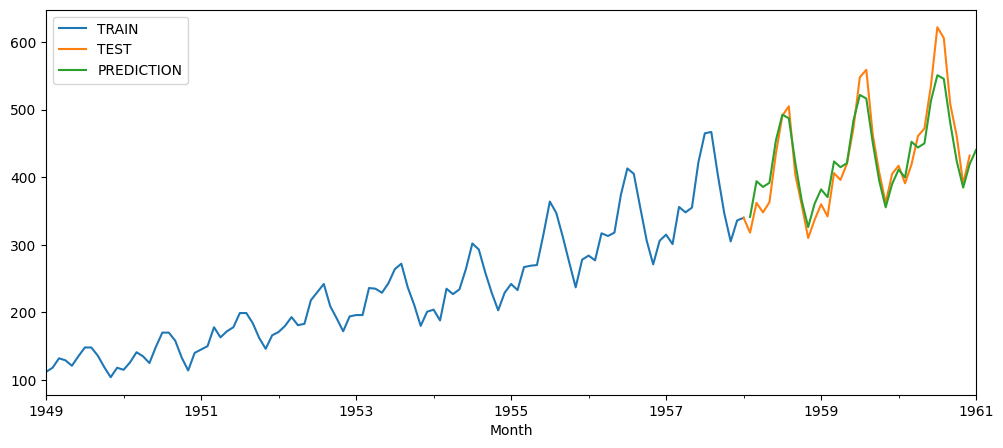

In [149]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_prediction.plot(legend=True, label='PREDICTION')

<Axes: xlabel='Month'>

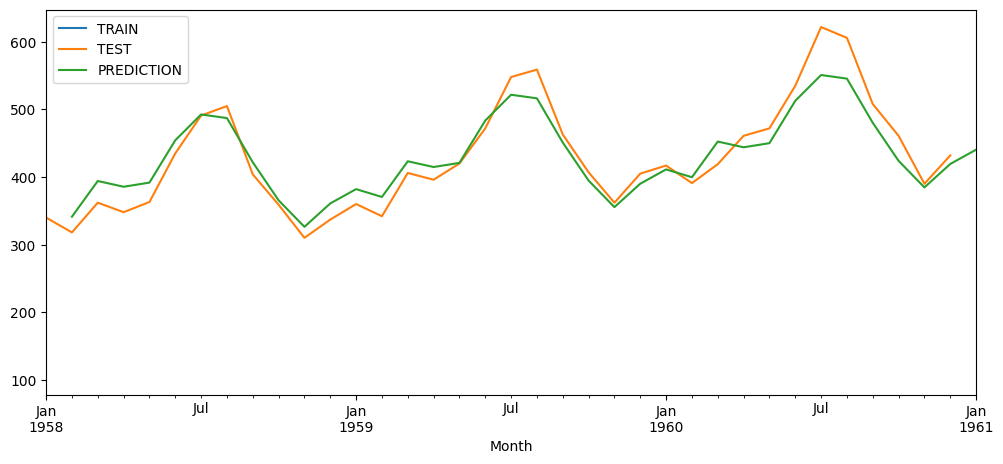

In [150]:
train_data['Thousands of Passengers'].plot(legend=True, label='TRAIN', figsize=(12,5))
test_data['Thousands of Passengers'].plot(legend=True, label='TEST')
test_prediction.plot(legend=True, label='PREDICTION', xlim=['1958-01-01', '1961-01-01'])

In [151]:
mean_absolute_error(test_data, test_prediction)

45.89190965925222

In [153]:
mean_squared_error(test_data, test_prediction)

3083.0393996528

In [154]:
np.sqrt(mean_squared_error(test_data, test_prediction))

55.525124039958705

## Final Model

In [161]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()

In [166]:
forecast_prediction = final_model.forecast(36)

<Axes: xlabel='Month'>

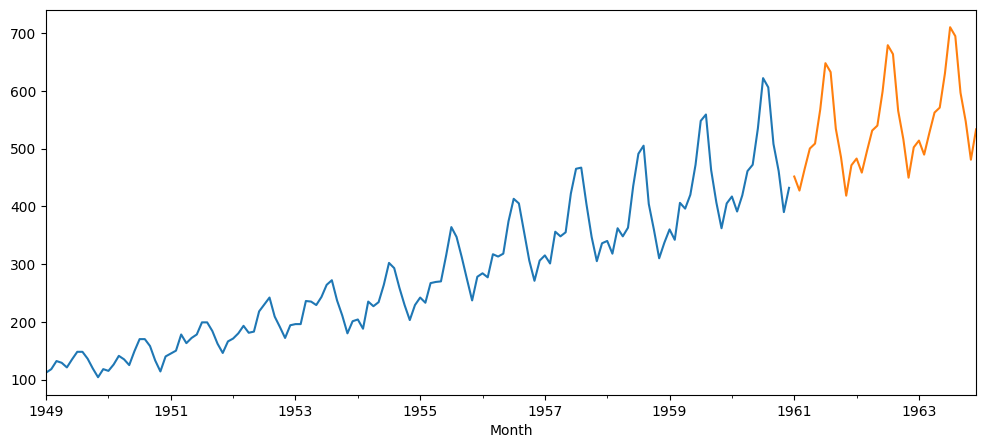

In [168]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_prediction.plot()

# samples

In [172]:
df2 = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\samples.csv', index_col=0, parse_dates=True)

In [174]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<Axes: >

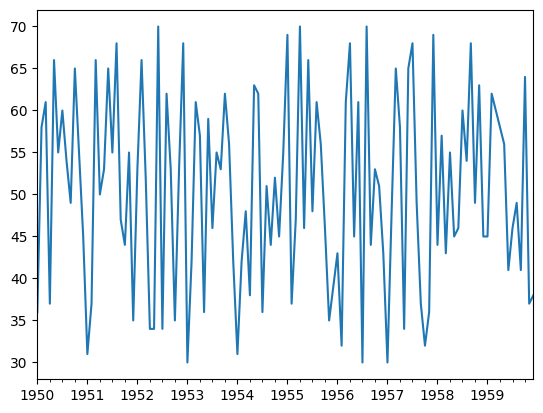

In [176]:
df2['a'].plot()

<Axes: >

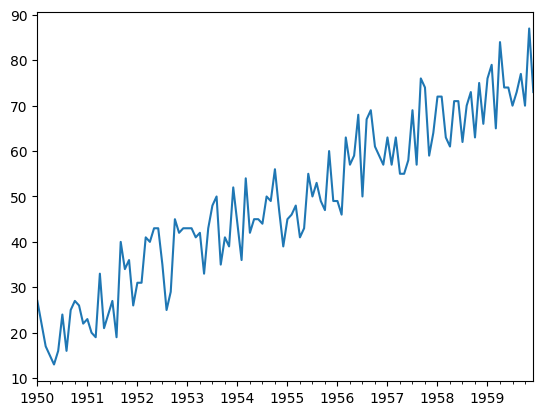

In [178]:
df2['b'].plot()

## First oder difference

### Allows to make a series stationary

In [180]:
from statsmodels.tsa.statespace.tools import diff

In [183]:
df2['b'] - df2['b'].shift(1)                                   

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [185]:
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<Axes: >

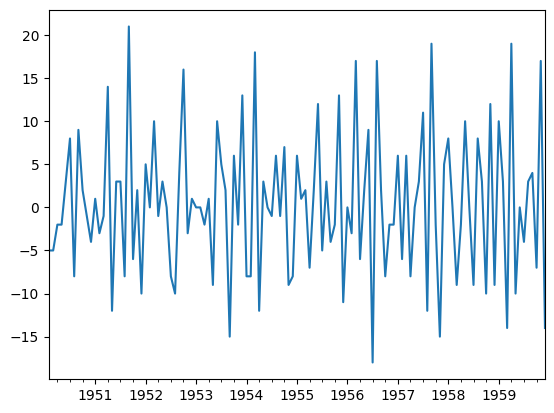

In [187]:
diff(df2['b'], k_diff=1).plot()